## Week 1 : Data Manipulation and Exploration
```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


### Content
```
Lab Plan
1. Data exploration
2. Dealing with categorical features
3. Dealing with missing data
4. Features Scaling
5. Trainset splitting
6. Data Visualization

```

<hr>


![](https://www.gosmar.eu/machinelearning/wp-content/uploads/2021/01/MLOps_pipeline_scaling3.png)

## Test for libraries installation 

In [2]:
import pandas as pd
import numpy as np
import sklearn
#rjvv
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

## 1. Read Data with Pandas

In [4]:
football_df = pd.read_csv('./football_data.csv', low_memory=False) #отсутствие смешанных типов low_memory = False
football_df.drop(['Date', 'time'], axis=1, inplace=True) #удаляем столбец Date, time

## 2. Data exploration

In [6]:
football_df.head(5)

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2016121101,13,2,NaN,2,1920.0,5.0,SD,44.0,44.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2016
1,2016121101,13,2,1.0,2,1920.0,0.0,SD,47.0,53.0,...,0.330475,0.968025,0.031975,0.940170,0.059830,0.031975,0.027855,0.024299,0.003556,2016
2,2016121101,13,2,1.0,2,1910.0,10.0,CAR,7.0,7.0,...,NaN,0.940170,0.059830,0.947575,0.052425,0.059830,-0.007405,NaN,NaN,2016
3,2016121101,13,2,2.0,2,1877.0,33.0,CAR,9.0,9.0,...,-3.766159,0.947575,0.052425,0.953601,0.046399,0.052425,-0.006025,0.036136,-0.042161,2016
4,2016121101,13,2,3.0,2,1868.0,9.0,CAR,9.0,9.0,...,0.000000,0.953601,0.046399,0.912354,0.087646,0.046399,0.041247,0.041247,0.000000,2016


In [7]:
types = football_df.dtypes
#print("Number categorical featues:", sum(types=='object'))
print(types)

GameID         int64
Drive          int64
qtr            int64
down         float64
TimeUnder      int64
              ...   
Win_Prob     float64
WPA          float64
airWPA       float64
yacWPA       float64
Season         int64
Length: 100, dtype: object


In [8]:
football_df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,1.000000e+04,10000.000000,10000.000000,8448.000000,10000.000000,9992.000000,9984.000000,9980.000000,9980.000000,10000.000000,...,3929.000000,9357.000000,9357.000000,9309.000000,9309.000000,10000.000000,9.845000e+03,3930.000000,3923.000000,10000.0
mean,2.016372e+09,12.444900,2.584500,1.991951,7.322400,1686.264011,20.739283,28.566433,47.859218,7.158400,...,-0.400785,0.547408,0.453126,0.547667,0.452708,0.470946,1.673133e-03,0.014596,-0.009764,2016.0
std,3.996451e+05,7.075561,1.131542,1.006399,4.685216,1064.437980,20.795996,12.533362,24.737534,4.844632,...,2.008014,0.300660,0.300744,0.302591,0.302650,0.319106,4.684680e-02,0.056720,0.065689,0.0
min,2.016121e+09,1.000000,1.000000,1.000000,0.000000,-849.000000,0.000000,1.000000,1.000000,0.000000,...,-12.156367,0.000000,0.000000,0.000000,0.000000,0.000000,-9.719480e-01,-0.943119,-0.939447,2016.0
25%,2.016122e+09,6.000000,2.000000,1.000000,3.000000,772.000000,5.000000,19.000000,29.000000,3.000000,...,-0.950799,0.298087,0.183309,0.295898,0.179571,0.172491,-1.375776e-02,-0.009758,-0.017638,2016.0
50%,2.016122e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,18.000000,30.000000,48.000000,9.000000,...,0.000000,0.565156,0.435096,0.568334,0.431754,0.486653,-7.985673e-07,0.004151,0.000000,2016.0
75%,2.017010e+09,18.000000,4.000000,3.000000,11.000000,2575.000000,37.000000,38.000000,69.000000,10.000000,...,0.469628,0.817714,0.702465,0.820549,0.705156,0.750169,1.278280e-02,0.033391,0.009991,2016.0
max,2.017010e+09,30.000000,5.000000,4.000000,15.000000,3600.000000,908.000000,50.000000,99.000000,36.000000,...,8.079540,1.000000,1.000000,1.000000,1.000000,1.000000,9.739204e-01,0.898214,0.932194,2016.0


## 3. Profiling the data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

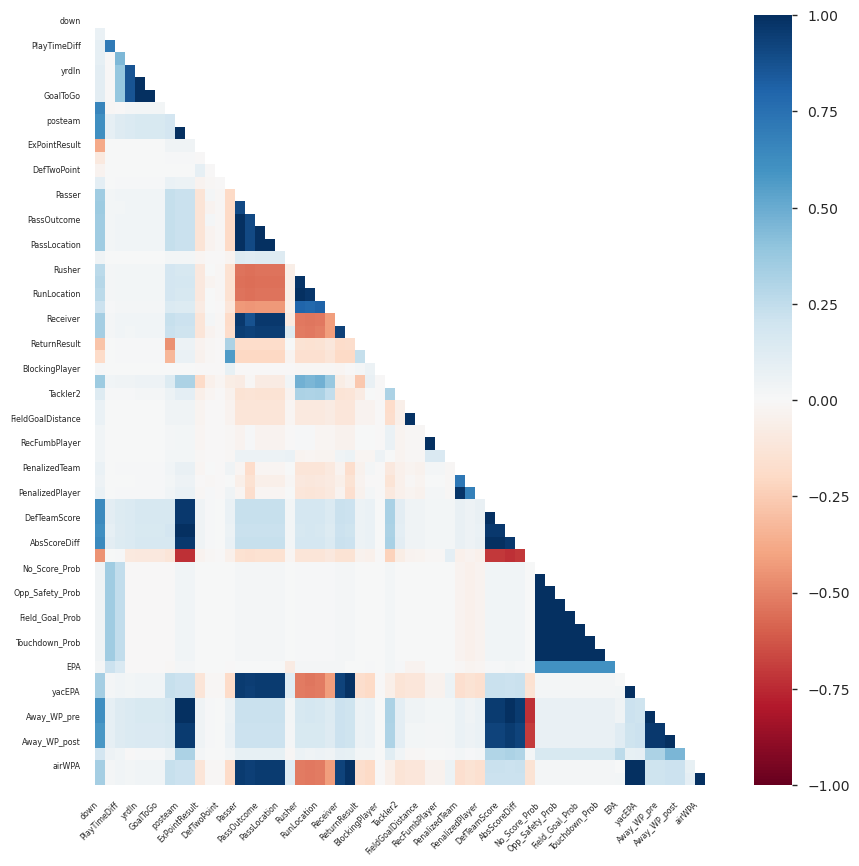

In [10]:
from ydata_profiling import ProfileReport  #doesn't work
#pip install ydata-profiling
report = ProfileReport(football_df)
report.to_file('data_profile_report.html')

### One-hot-encoding of categorical feature
1. Why to encode the categorical feature? - потому что алгоритмы машинного обучения требуют на вход числовые признаки
2. Why one-hot-encoding form? why not give each category in the feature a specific code value? -- чтобы избежать порядка 
3. How many new features will be added? What if we have some missing values, which is the case in this dataset? ---- сумма кол-во вариаций категориального признака по всем категориальным признакам
4. When is it appropriate to give each category an encoding value? когда сузществует порядковая связь


<span style="color:red"> Task : In the next cell, implement the function that take a dataframe, name of the categorical feature, and the encoder object. Then, adds new features that represent the one-hot-encoding form of this feature and ignore the missing values in it (encode them to zeros).

In [25]:
cat_feats = football_df.select_dtypes(include=['object']).columns.tolist()
print(len(cat_feats))

36


In [27]:
from category_encoders import OneHotEncoder
#pip install category-encoders
#название колонок, содержащее категориальные признаки
cat_feats = football_df.select_dtypes(include=['object']).columns.tolist()
print(len(cat_feats))
print(football_df.shape)
encoder = OneHotEncoder(cols=cat_feats, handle_unknown='ignore')
encoder.fit(football_df)
# Write your code here (1 line)
# Transform the data 
encoded_data = encoder.transform(football_df)
print(encoded_data.shape)
print(encoded_data)

#def my_encoder(dataframe, feature):
#    encoder = OneHotEncoder(cols=feature, handle_unknown='ignore')
#    encoder.fit(dataframe)
#    encoded_data = encoder.transform(dataframe)
#    return encoded_data
#print(my_encoder(football_df, ['SideofField']))

36
(10000, 100)
(10000, 13035)
          GameID  Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  \
0     2016121101     13    2   NaN          2    1920.0           5.0   
1     2016121101     13    2   1.0          2    1920.0           0.0   
2     2016121101     13    2   1.0          2    1910.0          10.0   
3     2016121101     13    2   2.0          2    1877.0          33.0   
4     2016121101     13    2   3.0          2    1868.0           9.0   
...          ...    ...  ...   ...        ...       ...           ...   
9995  2017010102     20    4   1.0          1      22.0           6.0   
9996  2017010102     20    4   NaN          1      13.0           9.0   
9997  2017010102     21    4   NaN          1      13.0           0.0   
9998  2017010102     21    4   1.0          1      12.0           1.0   
9999  2017010102     21    4   NaN          0       0.0          12.0   

      SideofField_1  SideofField_2  SideofField_3  ...    yacEPA  Home_WP_pre  \
0          

## 4. Data Imputation
#### Imputation is filling the missing values in the dataset.
Several issues to address:
1. Why we should fill them? Why not remove the rows that has missing values? we may lose valuable information on that feature, as we have deleted it completely due to some null values
2. Filling it with constant value for each value, but what's it? mean, median, mode, knn
3. (Advanced) Estimate the filling value, each row for its own.
4. How to choose the imputation strategy? 
5. (Not related only to imputations) Why we fit the imputer to the training data not the concatenation of both train and test set?
https://4geeks.com/lesson/how-to-deal-with-missing-values
https://tproger.ru/translations/data-imputation

<span style="color:red">Task :  In the next cell, implement a function that returns the count of nan/empty cells in a dataframe.</span><br>
<span style="color:red">Task : Use SimpleImputer object, fit it to the trainset, then transform both the train and test sets.</span>

In [43]:
print(pd.isnull(football_df))
print(football_df)

      GameID  Drive    qtr   down  TimeUnder  TimeSecs  PlayTimeDiff  \
0      False  False  False   True      False     False         False   
1      False  False  False  False      False     False         False   
2      False  False  False  False      False     False         False   
3      False  False  False  False      False     False         False   
4      False  False  False  False      False     False         False   
...      ...    ...    ...    ...        ...       ...           ...   
9995   False  False  False  False      False     False         False   
9996   False  False  False   True      False     False         False   
9997   False  False  False   True      False     False         False   
9998   False  False  False  False      False     False         False   
9999   False  False  False   True      False     False         False   

      SideofField  yrdln  yrdline100  ...  yacEPA  Home_WP_pre  Away_WP_pre  \
0           False  False       False  ...    True       

In [47]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

#TODO: Complete a function that returns number of empty cells 
def count_nans(df):
    bool_series = pd.isnull(df)
    missing_values_count = bool_series.sum().sum()
    return missing_values_count

# Print number of empty cells (1 line)
sum = 0
for k in range(len(football_df)):
    sum += count_nans(football_df.iloc[k])
print("#Empty missing data cells in the dataset = ", sum, count_nans(football_df))

# Write your code here (3-4 lines):
# create the imputer object
imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='mean')
# fit the imputer.
imputer = imputer.fit(encoded_data)
# transform the data
imputed_data = imputer.transform(encoded_data)
print("After Imputing:")
# Print number of empty cells in the data(1 line)
print("#Empty cells in dataset =", count_nans(imputed_data))
imputed_data = pd.DataFrame(imputed_data, columns=encoded_data.columns)


#Empty missing data cells in the dataset =  281986 281986
After Imputing:
#Empty cells in dataset = 0


## 5. Features Scaling
1. Why we need to make all the features have same range of values?
<span style="color:blue"> This has something to do with some machine learning algorithms.
First, gradient-related algorithms (e.g., linear regression, logisitic regression, deep learning algorithms): feature scaling is important for the congergence of the algorithms as the gradient in one direction/feature could need more/long steps than the others and the scaling solves this issue and make the training stable and relatively faster.
Second, distance related algorithms (e.g., KNN, K-means). These algorithms depends on the distance between samples both in training and testing. Having features with different ranges would affect the distance measure and produce biased prediciton to the features with larger range.
for example: having two features (length in KM [10: 10000] and temperature in C° [20: 40]). The distance value will be much affected by the length feature.</span>

1. What are the different strategies to scale the features? <br>
    * <span style="color:blue">Min-Max scaling: transform all features to fall in this range: [0, 1].</span><br>
$$x_i = \frac{x_i - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})}$$
    * <span style="color:blue">Standard scaling: transform all features to have mean = 0 and standard deviation = 1. And by assuming that all features follow normal distribution, we can say that standard scaling turns featrues to be $\sim N(0,1)$.</span> <br>
$$x_i = \frac{x_i - mean(\mathbf{x})}{stdev(\mathbf{x})}$$ <br>
    * <span style="color:blue">Robust scaling: robust to the outliers that may affect the previous methods in calculating their mean, stdev, min, or max. It uses the interquartile range to scale the features according to it.
Interquartile is the range between the 1st quartile and 3rd quartile.</span> <br>
$$x_i = \frac{x_i - Q_1(\mathbf{x})}{Q_3(\mathbf{x}) - Q_1(\mathbf{x})}$$ 

3. How to choose the strategy?
<span style="color:blue">Same as in imputation strategy, using a validation set or using cross-validation.

<span style="color:red">  In the following cell, scale all the features with a scaler from your choice. Fit the scaler on the full data set and transform both it.</span>

In [22]:
print(imputed_data)

            GameID  Drive  qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
0     2.016121e+09   13.0  2.0  1.991951        2.0    1920.0           5.0   
1     2.016121e+09   13.0  2.0  1.000000        2.0    1920.0           0.0   
2     2.016121e+09   13.0  2.0  1.000000        2.0    1910.0          10.0   
3     2.016121e+09   13.0  2.0  2.000000        2.0    1877.0          33.0   
4     2.016121e+09   13.0  2.0  3.000000        2.0    1868.0           9.0   
...            ...    ...  ...       ...        ...       ...           ...   
9995  2.017010e+09   20.0  4.0  1.000000        1.0      22.0           6.0   
9996  2.017010e+09   20.0  4.0  1.991951        1.0      13.0           9.0   
9997  2.017010e+09   21.0  4.0  1.991951        1.0      13.0           0.0   
9998  2.017010e+09   21.0  4.0  1.000000        1.0      12.0           1.0   
9999  2.017010e+09   21.0  4.0  1.991951        0.0       0.0          12.0   

      SideofField_1  SideofField_2  SideofField_3  

In [49]:
#масштабирование
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
# Write your code here (4 lines):
# choose the scaler class.
# create the scaler object.
scaler = preprocessing.RobustScaler()
# fit it to the data.
robust_df = scaler.fit_transform(imputed_data)
# transform the data
robust_df = pd.DataFrame(robust_df, columns=imputed_data.columns)
print(robust_df)
print(football_df)




        GameID     Drive  qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
0    -0.001465  0.083333 -0.5 -0.008049     -0.625  0.066583      -0.40625   
1    -0.001465  0.083333 -0.5 -1.000000     -0.625  0.066583      -0.56250   
2    -0.001465  0.083333 -0.5 -1.000000     -0.625  0.061035      -0.25000   
3    -0.001465  0.083333 -0.5  0.000000     -0.625  0.042724       0.46875   
4    -0.001465  0.083333 -0.5  1.000000     -0.625  0.037731      -0.28125   
...        ...       ...  ...       ...        ...       ...           ...   
9995  0.999327  0.666667  0.5 -1.000000     -0.750 -0.986545      -0.37500   
9996  0.999327  0.666667  0.5 -0.008049     -0.750 -0.991538      -0.28125   
9997  0.999327  0.750000  0.5 -0.008049     -0.750 -0.991538      -0.56250   
9998  0.999327  0.750000  0.5 -1.000000     -0.750 -0.992093      -0.53125   
9999  0.999327  0.750000  0.5 -0.008049     -0.875 -0.998752      -0.18750   

      SideofField_1  SideofField_2  SideofField_3  ...    yacEP

In [ ]:
print(robust_df)

## 6. Trainset splitting
Issues that lead to trainset splitting:
1. How we will measure the performance of our model?
<span style="color:blue"> Measuring performance on the trainset is not a good idea intuitively, as to estimate the generalization error, we need to evaluate the model on a data that wasn't seen before.
So we need to split the dataset that we have to two parts trainset and testset.
2. How we will tune the hyperparamters? Can it be done with testset?
<span style="color:blue"> If we tuned the hyperparamters on the testset, this will be considered as Data leakage as the hyperparams were tuned on the set that represent the evaluation, so there's a high chance that it will overfit the testset and fails to generalize (i.e., get high test accuracy but fails in production for example).
So, it is a must to split the data into 3 parts:
(70%) trainset to train the params , (10%) validation set to tune the hyperparameters (it can be used for other stuff like early stopping (tbe)), and (20%) testset to evaluate the model finally.

Issues to think of:
1. Is is the best strategy to get the best estimate for the true risk/performance of the system?
<span style="color:blue"> There's a chance that the testset is biased. So, a better way to estimate the true generalization error is to use cross validation.
Cross validation is a method where the dataset, is divided into k equally sized folds then we train on k-1 folds and test on the left one and repeat this process k times for each fold and get k estimates, finally we average all of these k accuracies to represent the final accuracy.
2. (Advanced) How to choose between two models?
If you have two models one with test accuracy 90% and the other with 91% (averaged from cross valdiation), which one to choose?
<span style="color:blue"> The naive/fast approach is to use the model with higher accuracy. But what if these estimates are not significantly different (we got them by chance), then a hypothesis test needs to be done.
After testing each model for each fold from the k-folds we can use "Paired t-test" to test if they are significantly different or not.
<br />(more advanced way, which is used in industry: A/B testing, watch about it [here](https://www.youtube.com/watch?v=zFMgpxG-chM))

<span style="color:red"> TASK : In the next task, you will split your data into 3 parts, train, test, and validation by ratios: 70%, 20%, and 10% respectively.</span>

In [116]:
from sklearn.model_selection import train_test_split

# TODO: Write your code here (2 lines)
x = robust_df.drop(columns=['Win_Prob'])  # Features
y = robust_df['Win_Prob'] 
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.66)
#x, x_test, y, y_test = train_test_split(xtrain,labels,test_size=0.2,train_size=0.8)
#x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

print(x_train.shape, x_test.shape, x_val.shape)

(7000, 13034) (1980, 13034) (1020, 13034)


## 7. Data Visualization
Visualization is key-issue to get some insights and intuition about your dataset.
How to plot 259 features (259-dimensional data)? what we can plot -at maximum- is 2d or 3d data.

Hint: We should reduce the dimension. Read this [article](https://towardsdatascience.com/dimensionality-reduction-ways-and-intuitions-1b5e97592d8e).

So, Let's use UMAP to reduce the dimension of this dataset to be 2D.

In [28]:
from sklearn.decomposition import PCA

dim_reducer = PCA(n_components=2)
x_train_reduced = dim_reducer.fit_transform(x_train)
print(x_train_reduced)

[[  0.63013529  -1.50720983]
 [-13.0227711    9.69581608]
 [  9.31083291   5.29980519]
 ...
 [ -5.62178803   2.30212933]
 [  0.81677407  -1.32766613]
 [  0.70556389  -1.52518688]]


In [29]:
pca_df = pd.DataFrame(data=x_train_reduced, columns=['PC1', 'PC2'])
print(pca_df)

            PC1       PC2
0      0.630135 -1.507210
1    -13.022771  9.695816
2      9.310833  5.299805
3      0.612207 -1.497731
4      0.787081 -1.392625
...         ...       ...
6995  -3.135626 -3.521022
6996  -0.307425 -1.555819
6997  -5.621788  2.302129
6998   0.816774 -1.327666
6999   0.705564 -1.525187

[7000 rows x 2 columns]


Let's plot the reduced dataset on a 2D plane.
Use matplotlib to make a scatter plot for the reduced dataset.

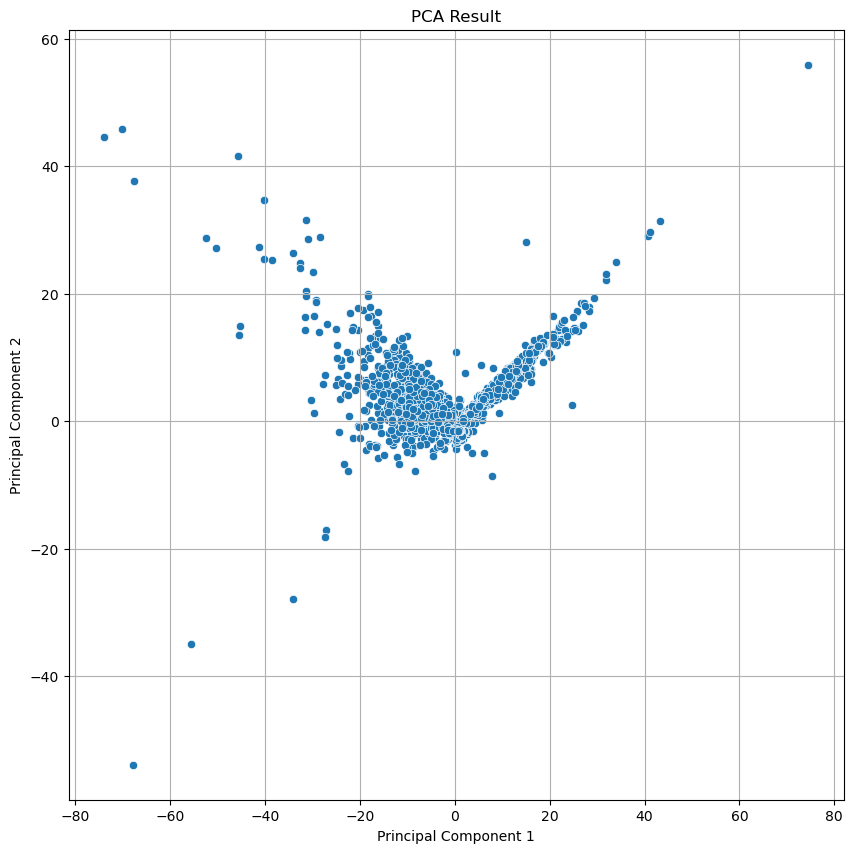

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')  # Add hue='target' for coloring by target variable
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()
# Write code to plot the reduced dataset in a scatter plot.

## 8. Self Practice task

Using the Football dataset follow the steps below:
1. Select `Win_Prob` as target variable 
1. Remove columns with constant value (i.e all the values in the column are equal to zero)
1. Extract features from `Date` and `time` column
1. Remove all columns with more than 99% missing values
1. Remove all columns with 99% distinct values
1. Split the data into train (80%) and test(20%) sets. 
1. Split the train data into train (80%) and validation sets. 
1. Encode categorical data using a different encoder (not One Hot encoder) : see [Category Encoders](https://contrib.scikit-learn.org/category_encoders/index.html) for a full list. remember that you fit the encoder on train data only and then transform test data
1. Impute missing values

<span style="color:red"> NOTE : Make use of the insights from pandas profiling report</span>

In [100]:
#Select Win_Prob as target variable
X = football_df.drop(columns=['Win_Prob'])  # Features
Y = football_df['Win_Prob'] 

In [102]:
print(X)

          GameID  Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  \
0     2016121101     13    2   NaN          2    1920.0           5.0   
1     2016121101     13    2   1.0          2    1920.0           0.0   
2     2016121101     13    2   1.0          2    1910.0          10.0   
3     2016121101     13    2   2.0          2    1877.0          33.0   
4     2016121101     13    2   3.0          2    1868.0           9.0   
...          ...    ...  ...   ...        ...       ...           ...   
9995  2017010102     20    4   1.0          1      22.0           6.0   
9996  2017010102     20    4   NaN          1      13.0           9.0   
9997  2017010102     21    4   NaN          1      13.0           0.0   
9998  2017010102     21    4   1.0          1      12.0           1.0   
9999  2017010102     21    4   NaN          0       0.0          12.0   

     SideofField  yrdln  yrdline100  ...    airEPA    yacEPA  Home_WP_pre  \
0             SD   44.0        44.0  ...      

In [103]:
data = {
    'A': [0, 0, 0],
    'B': [1, 2, 3],
    'C': [0, 0, 0],
    'D': [4, 5, 6]
}
df = pd.DataFrame(data)
print(df)
print(df.loc[:,(df != 0).any()])
print(df.isnull().mean())

   A  B  C  D
0  0  1  0  4
1  0  2  0  5
2  0  3  0  6
   B  D
0  1  4
1  2  5
2  3  6
A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64


In [104]:
#Remove columns with constant value (i.e all the values in the column are equal to zero)
print(X.shape)
print((X == 0).all())
X = X.loc[:, (X != 0).any()]
print(X.shape)

(10000, 99)
GameID          False
Drive           False
qtr             False
down            False
TimeUnder       False
                ...  
Away_WP_post    False
WPA             False
airWPA          False
yacWPA          False
Season          False
Length: 99, dtype: bool
(10000, 99)


In [107]:
#Extract features from Date and time column
#print(football_df['Date'])

In [108]:
#Remove all columns with more than 99% missing values
missing_percentage = X.isnull().mean()
print(missing_percentage)
columns_to_drop = missing_percentage[missing_percentage > 0.99].index
print(columns_to_drop)


GameID          0.0000
Drive           0.0000
qtr             0.0000
down            0.1552
TimeUnder       0.0000
                 ...  
Away_WP_post    0.0691
WPA             0.0155
airWPA          0.6070
yacWPA          0.6077
Season          0.0000
Length: 99, dtype: float64
Index(['TwoPointConv', 'DefTwoPoint', 'BlockingPlayer', 'RecFumbTeam',
       'RecFumbPlayer', 'ChalReplayResult'],
      dtype='object')


In [110]:
print(X.shape)
X = X.drop(columns= columns_to_drop)
print(X.shape)

(10000, 99)
(10000, 93)


In [112]:
#Remove all columns with 99% distinct values
distinct_counts = X.nunique()
total_rows = len(X)
columns_to_drop = distinct_counts[distinct_counts > 0.99 * total_rows].index
X = X.drop(columns=columns_to_drop)

In [118]:
#Split the data into train (80%) and test(20%) sets.
#Split the train data into train (80%) and validation sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_val, X_train, Y_val, Y_train = train_test_split(X_train, Y_train, test_size=0.8)
print(X_train.shape, X_test.shape, X_val.shape)

(6400, 93) (2000, 93) (1600, 93)


In [119]:
print(Y_test)

8428    0.400604
2262    0.778157
5465    0.800970
3908    0.511725
6165    0.282119
          ...   
6604    0.626854
3424    0.917715
3848    0.838156
7855    0.214305
4292    0.148738
Name: Win_Prob, Length: 2000, dtype: float64


In [120]:
#Encode categorical data using a different encoder (not One Hot encoder) : see Category Encoders for a full list. remember that you fit the encoder on train data only and then transform test data
from category_encoders import BinaryEncoder
cat_feats2 = football_df.select_dtypes(include=['object']).columns.tolist() 
encoder2 = BinaryEncoder(cols = cat_feats)
encoded_data2 = encoder2.fit_transform(football_df)

In [121]:
imputer2 = SimpleImputer(missing_values = np.nan, 
                        strategy ='mean')
# fit the imputer.
imputer2 = imputer2.fit(encoded_data2)
# transform the data
imputed_data2 = imputer2.transform(encoded_data2)
print("After Imputing:")
# Print number of empty cells in the data(1 line)
print("#Empty cells in dataset =", count_nans(imputed_data2))
imputed_data2 = pd.DataFrame(imputed_data2, columns=encoded_data2.columns)


After Imputing:
#Empty cells in dataset = 0
